## This is a simple model for tracking pandemics. 
It is called the SIRD model because it tracks the number of people over time in each of four categories: Susceptible, Infected, Removed/Recovered, and Deceased.


In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [2]:
beta = .09 # infection rate
gamma = .01 # rate of recovery
mu = .005 # mortality rate

In [3]:
dt = .1 # the size of a step
steps = np.arange(0, 3650) # 365 days in a year, one notch is a tenth of a day
time = dt* steps # should be ints from 0 to 365

In [4]:
def SIRD(s, i, r, d, beta, gamma, mu):
    # todo: document how these equations came to be
    s_dot = -s*i*beta/(s+i+r+d)
    i_dot = s*i*beta/(s+i+r+d)-gamma*i-mu*i
    r_dot = gamma*i
    d_dot = mu*i 
    return s_dot, i_dot, r_dot, d_dot

In [5]:
# initialize s, i, r, d as empty lists...
s = np.empty(len(time))
i = np.empty(len(time))
r = np.empty(len(time))
d = np.empty(len(time))

# ...and add their initial conditions
s[0] = 1000
i[0] = 1
r[0] = 0
d[0] = 0

In [6]:
# simple euler's method of solving diff eq's
def euler(s,i,r,d,beta,gamma,mu,steps,dt):
    for t in steps:
        if t < len(steps) - 1:
            s_dot, i_dot, r_dot, d_dot = SIRD(s[t], i[t], r[t], d[t], beta, gamma, mu)
            s[t+1] = s[t]+dt*s_dot
            i[t+1] = i[t]+dt*i_dot
            r[t+1] = r[t]+dt*r_dot
            d[t+1] = d[t]+dt*d_dot
    return s, i, r, d

In [7]:
s, i, r, d = euler(s, i, r, d, beta, gamma, mu, steps, dt)

## My choice of naming variables has been sort of convoluted, so allow me to explain:
When s, i, r, and d were initialized, they were just lists. Then we added their initial values at t = 0. Then I defined a function (called euler) which would take four numpy arrays and some adjustable paramters, iteratively perform euler's method, and return those four (now updated) arrays. The line directly above this comment sets the list s, i, r, d (each of which hitherto contains only one nontrivial element) as now equal to the result of that euler function.

Text(0.5, 1.0, 'Deceased')

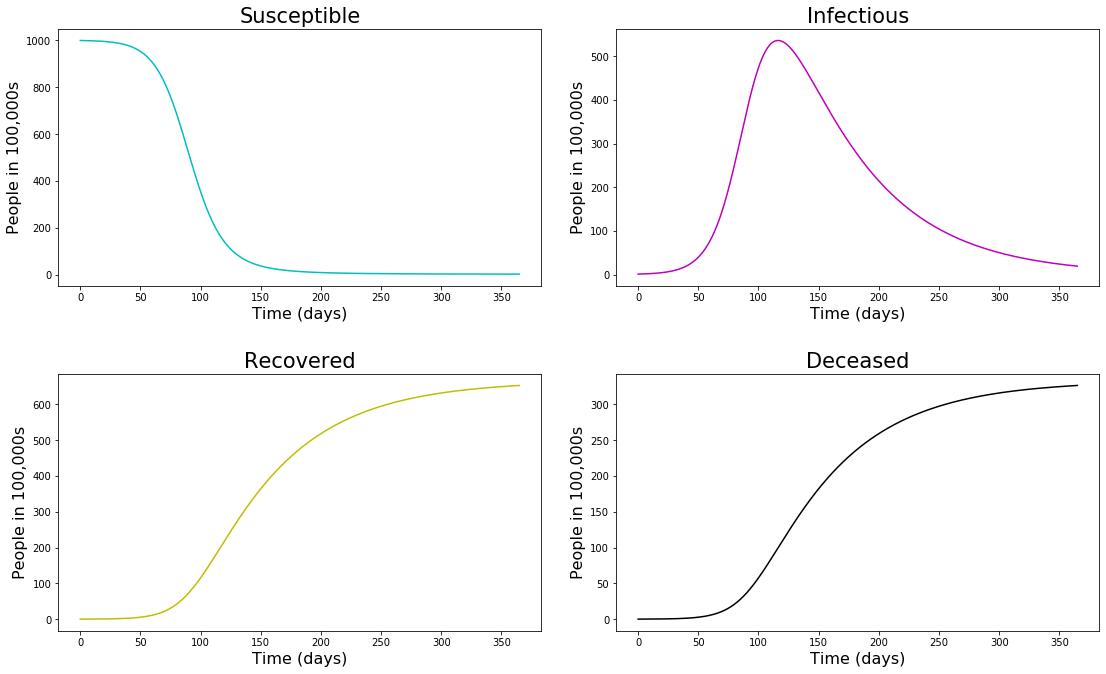

In [8]:
# now on to the fancy plotting:
plt.figure(figsize=(16, 10))

plt.subplot(221)
plt.plot(time, s, color  = 'c')
plt.xlabel('Time (days)', fontsize=16)
plt.ylabel('People in 100,000s', fontsize=16)
plt.title('Susceptible', fontsize=21)
plt.tight_layout(pad = 3)

plt.subplot(222)
plt.plot(time, i, color  = 'm')
plt.xlabel('Time (days)', fontsize=16)
plt.ylabel('People in 100,000s', fontsize=16)
plt.title('Infectious', fontsize=21)
plt.tight_layout(pad = 3)

plt.subplot(223)
plt.plot(time, r, color  = 'y')
plt.xlabel('Time (days)', fontsize=16)
plt.ylabel('People in 100,000s', fontsize=16)
plt.title('Recovered', fontsize=21)
plt.tight_layout(pad = 3)

plt.subplot(224)
plt.plot(time, d, color = 'k')
plt.xlabel('Time (days)', fontsize=16)
plt.ylabel('People in 100,000s', fontsize=16)
plt.title('Deceased', fontsize=21)

0

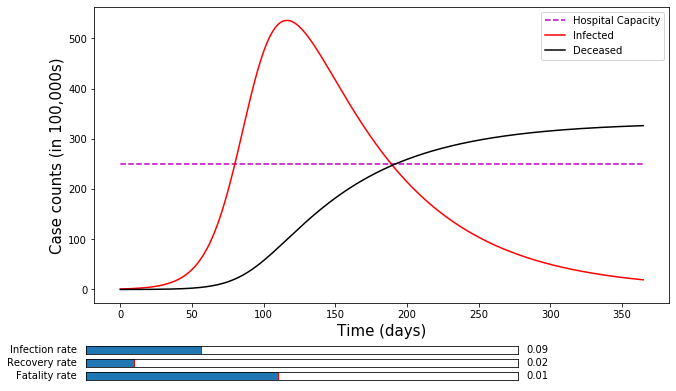

In [9]:
# yay four pretty plots! Now I wanna make a pretty intereactive plot
fig = plt.figure(figsize=(10, 6))
plt.xlabel('Time (days)', size = 15)
plt.ylabel('Case counts (in 100,000s)', size = 15)

# horizontal line for hospital's carrying capacity
horiz = np.array([250 for i in range(len(time))])

# the three plots and a legend
plt.plot(time, horiz, 'm--') 
int_ploti, = plt.plot(time,i,markersize=.8,c='r')
int_plotd, = plt.plot(time,d,markersize=.8,c='k')
plt.legend(['Hospital Capacity', 'Infected', 'Deceased'])
plt.tight_layout(pad = 5)

# three axes, three sliders
a_ax = plt.axes([0.12, 0.08, 0.6, 0.02])
a_slider = Slider(a_ax,      
                  'Infection rate',            
                  .05,          
                  .2,          
                  valinit=.09  
                 )
b_ax = plt.axes([0.12, 0.05, 0.6, 0.02])
b_slider = Slider(b_ax,      
                  'Recovery rate',            
                  .01,          
                  .1,          
                  valinit=.02 
                 )

c_ax = plt.axes([0.12, 0.02, 0.6, 0.02])
c_slider = Slider(c_ax,      
                  'Fatality rate',            
                  .001,          
                  .01,          
                  valinit=.005 
                 )
slidelist = [.09,.02,.005]
# slidelist serves as a list of beta, gamma, and mu that will be updated
# so as not to interfere with the global variables

# i must introduce some new updater functions for interaction's sake:
def update_a(a):
    new_data = euler(s, i, r, d, a, slidelist[1], slidelist[2], steps, dt)
    int_ploti.set_ydata(new_data[1])
    int_plotd.set_ydata(new_data[3])
    slidelist[0] = a
    fig.canvas.draw_idle()
    
def update_b(b):
    new_data = euler(s, i, r, d, slidelist[0], b, slidelist[2], steps, dt)
    int_ploti.set_ydata(new_data[1])
    int_plotd.set_ydata(new_data[3])
    slidelist[1] = b
    fig.canvas.draw_idle()

def update_c(c):
    new_data = euler(s, i, r, d, slidelist[0], slidelist[1], c, steps, dt)
    int_ploti.set_ydata(new_data[1])
    int_plotd.set_ydata(new_data[3])
    slidelist[2] = c
    fig.canvas.draw_idle() 
    
# and now must call those functions:
a_slider.on_changed(update_a)
b_slider.on_changed(update_b)
c_slider.on_changed(update_c)